In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standarize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [2]:
boston_dataset = load_boston()

# create a dataframe with the independent variables
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# to train and evaluate the model, let's first split into
# train and test data, using 3 variables of choice:
# LSTAT, RM and CRIM

# let's separate into training and testing set
# using the sklearn function below

X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
linreg = LinearRegression()

 
linreg.fit(scaler.transform(X_train), y_train)

 
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

 
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 28.603232128198893
Test set
Linear Regression mse: 33.2000629530844



In [8]:
# calculate the residuals

error = y_test - pred

In [10]:
error.dtype

dtype('float64')

## Test residuals normality

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

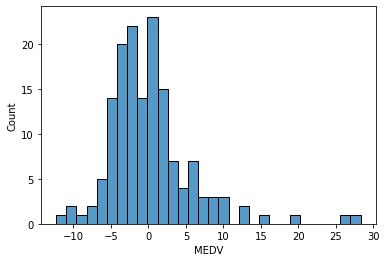

In [11]:
sns.histplot(error, bins=30)

We see that the residuals show a fairly normal distribution centered at 0. Not perfect, by visual inspection there is some skew towards the left, with a few higher unusual values towards the right of the distribution.

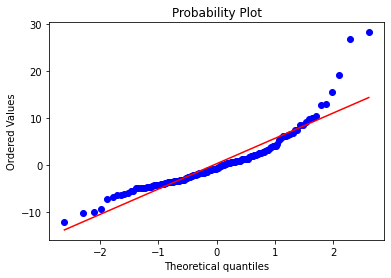

In [12]:
# we can better visualize residuals distribution with 
# a Q-Q plot. If the residuals are normally distributed
# the dots should adjust to the 45 degree line

stats.probplot(error, dist="norm", plot=plt)
plt.show()

From the Q-Q plot we see more easily how the residuals deviate from the red line towards the ends of the distribution, thus, they are not normally distributed.

## Homoscedasticity

The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs each one of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.
There are other tests for homoscedasticity:
* Residuals plot
* Levene’s test
* Barlett’s test
* Goldfeld-Quandt Test

Text(0, 0.5, 'Residuals')

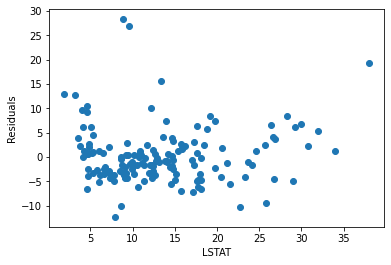

In [13]:
# plot the residuals vs one of the independent
# variables, LSTAT in this case

plt.scatter(x=X_test['LSTAT'], y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residuals')

The residuals seem fairly homogeneously distributed across the values of LSTAT.

Text(0, 0.5, 'Residuals')

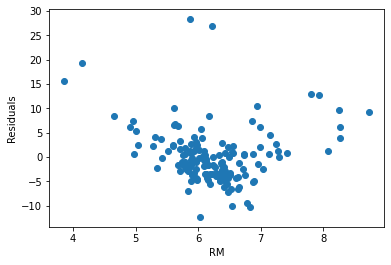

In [14]:
# let's plot the residuals vs RM
plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuals')

For this variable, the residuals do not seem to be homogeneously distributed across the values of RM. In fact, low and high values of RM show higher error terms.

Text(0, 0.5, 'Residuals')

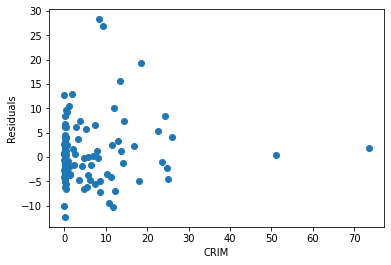

In [15]:
# plot the residuals vs one of the independent
# variables, CRIM in this case

plt.scatter(x=X_test['CRIM'], y=error)
plt.xlabel('CRIM')
plt.ylabel('Residuals')

Most values of CRIM are skewed towards the left, so it is hard to say if the residuals show the same variance for all values of CRIM, because we have very few data points for CRIM when its values are high.

In [17]:
!pip install yellowbrick

     |████████████████████████████████| 271 kB 593 kB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 1.9 MB/s eta 0:00:01     |██████████████████████████████▋ | 14.9 MB 1.9 MB/s eta 0:00:01
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.5 which is incompatible.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


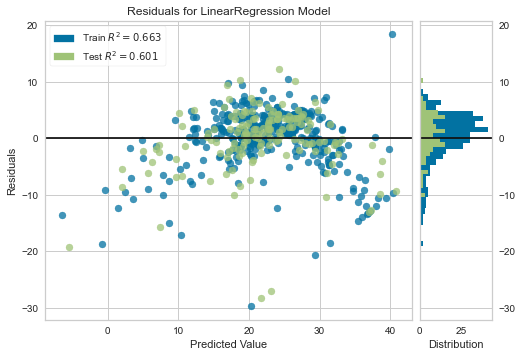

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [18]:
# yellowbricks allows you to visualise the residuals of the
# models after fitting a linear regression

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

On the right, we have the distribution of the residuals in the train and test sets. We see that it is not perfectly centered at 0.

On the left, we have the residuals vs the predicted value, we also see that the variance is not constant. Towards the extremes of the predictions, the model is under-estimating the outcome (most residuals are negative). And towards the center of the predictions, the model is over-estimating the outcome. So the residuals variance is not constant for all values.

## Transform the data to improve model fit

The Box-Cox transformation.

In [19]:
import scipy.stats as stats

# apply the box-cox transformation to the variables
boston['LSTAT'], _ = stats.boxcox(boston['LSTAT'])
boston['CRIM'], _ = stats.boxcox(boston['CRIM'])
boston['RM'], _ = stats.boxcox(boston['RM'])

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [20]:
# let's scale the features

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [21]:
linreg = LinearRegression()

 
linreg.fit(scaler.transform(X_train), y_train)

 
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

 
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 25.020138527672213
Test set
Linear Regression mse: 29.70979354458992



In [22]:
error = y_test - pred

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

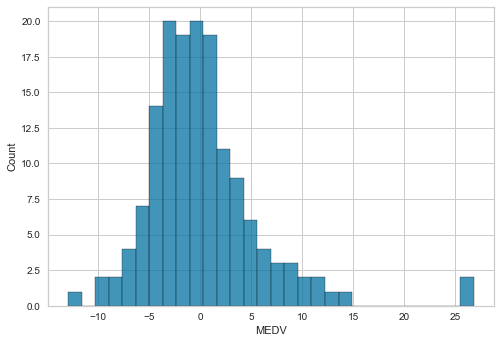

In [23]:
sns.histplot(error, bins=30)

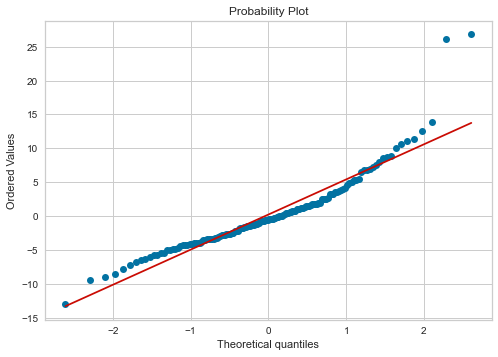

In [24]:
stats.probplot(error, dist="norm", plot=plt)
plt.show()

We see an improvement: the residuals are now "more" normally distributed.

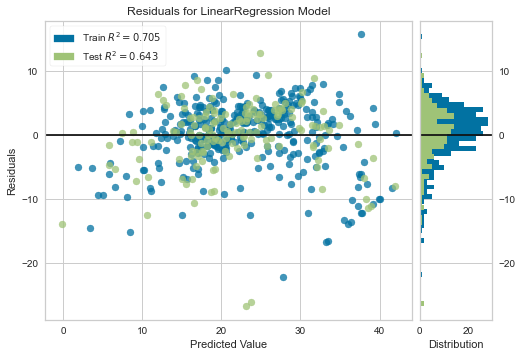

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [25]:
from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

We can see a noticeable improvement in the distribution of the residuals, now better centered at 0, and with a more even variance across all values of the prediction.


## Multicolinearity

In [26]:
# capture features in a list
features = boston_dataset.feature_names

<AxesSubplot:>

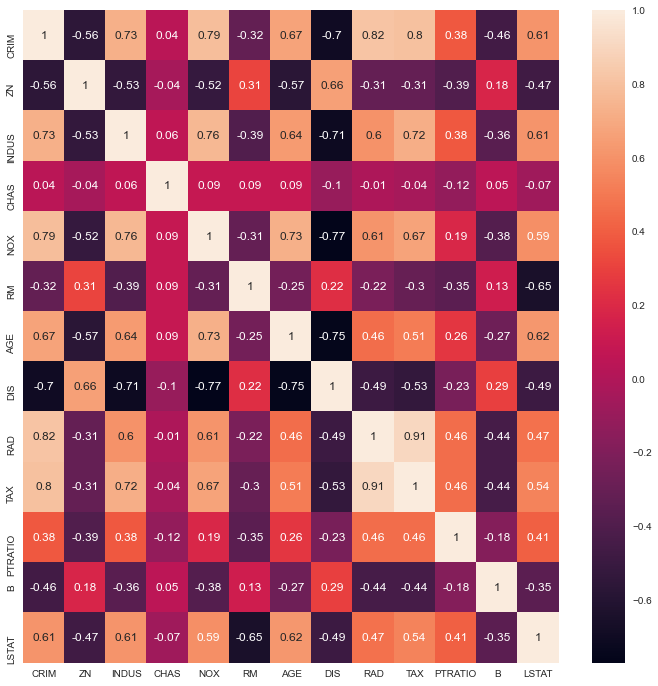

In [27]:
# we calculate the correlations using pandas corr
# and we round the values to 2 decimals
correlation_matrix = boston[features].corr().round(2)

# plot the correlation matrix usng seaborn
# annot = True to print the correlation values
# inside the squares

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

On the x and y axis of the heatmap we have the variables of the boston house dataframe. Within each square, the correlation value between those 2 variables is indicated. For example, for LSTAT vs CRIM at the bottom left of the heatmap, we see a correlation of 0.46. These 2 variables are not highly correlated.

Instead, for the variables RAD and TAX (try and find them in the plot), the correlation is 0.91. These variables are highly correlated. The same is true for the variables NOX and DIS, which show a correlation value of -0.71.
 

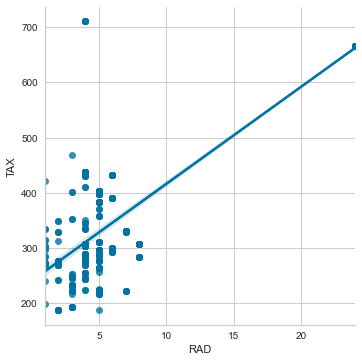

In [28]:
# correlation between RAD (index of accessibility to radial highways)
# and TAX (full-value property-tax rate per $10,000)

sns.lmplot(x="RAD", y="TAX", data=boston, order=1)

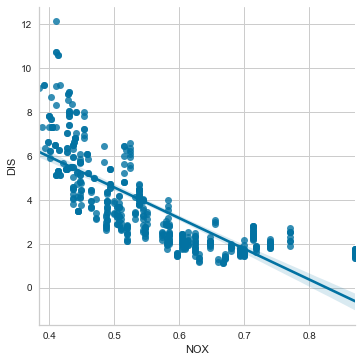

In [29]:
# and now NOX (itric oxides concentration (parts per 10 million))
# and DIS (weighted distances to five Boston employment centres)

sns.lmplot(x="NOX", y="DIS", data=boston, order=1)

The correlation, or co-linearity between NOX and DIS, is quite obvious in the above scatter plot. So these variables are violating the assumption of no multi co-linearity.
What we would do is remove 1 of the 2 from the dataset before training the linear model.